### Dataset

For this homework, we'll use the Car Fuel Efficiency dataset. Download it from 
<a href='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'>here</a>.


### Preparing the dataset 

Use only the following columns:

* `'engine_displacement'`,
* `'horsepower'`,
* `'vehicle_weight'`,
* `'model_year'`,
* `'fuel_efficiency_mpg'`

<h1>EDA</h1>

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(filepath_or_buffer="car_fuel_efficiency.csv")

df = df[[
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg']]
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [62]:
df.dtypes

engine_displacement      int64
horsepower             float64
vehicle_weight         float64
model_year               int64
fuel_efficiency_mpg    float64
dtype: object

### Question 1

There's one column with missing values. What is it?

* `'engine_displacement'`
* `'horsepower'`
* `'vehicle_weight'`
* `'model_year'`

In [63]:
missing_value_columns = df.columns[df.isnull().any()].tolist()
missing_value_columns

['horsepower']

### Question 2

What's the median (50% percentile) for variable `'horsepower'`?

- 49
- 99
- 149
- 199

In [64]:
horsepower_median = df['horsepower'].median()

horsepower_median

df['horsepower']


0       159.0
1        97.0
2        78.0
3         NaN
4       140.0
        ...  
9699    164.0
9700    154.0
9701    138.0
9702    177.0
9703    140.0
Name: horsepower, Length: 9704, dtype: float64

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures


In [65]:
n=len(df)

nval= int(n*0.2)
ntest = int(n*0.2)
ntrain = n - nval - ntest


idx= np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)


dfVal = df.iloc[idx[:nval]]
dfTrain = df.iloc[idx[nval:nval+ntrain]]
dfTest = df.iloc[idx[nval+ntrain:]]


dfVal.shape,dfTrain.shape,dfTest.shape

((1940, 5), (5824, 5), (1940, 5))

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

 <h3>Fill it with 0 Dataset

In [66]:

yTrain = np.log1p(dfTrain.fuel_efficiency_mpg.values)
yVal = np.log1p(dfVal.fuel_efficiency_mpg.values)
yTest = np.log1p(dfTest.fuel_efficiency_mpg.values)

del dfTrain['fuel_efficiency_mpg']
del dfVal['fuel_efficiency_mpg']
del dfTest['fuel_efficiency_mpg']
print(dfTrain.shape, dfVal.shape, dfTest.shape)

base= [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',]

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

def dot(xi, w):
    n = len(xi)
    res = 0.
    for j in range(n):
        res += xi[j] * w[j]
    return res

def linear_regression(x, y):
    ones = np.ones(x.shape[0])
    X = np.column_stack([ones, x])

    XTX= X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0] , w[1:]



(5824, 4) (1940, 4) (1940, 4)


<Axes: ylabel='Count'>

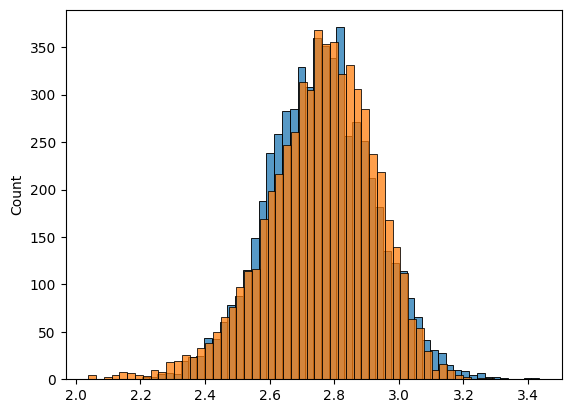

In [67]:
xTrain = prepare_X(dfTrain)
w0, w = linear_regression(xTrain, yTrain)

yPred = w0 + xTrain.dot(w)

sns.histplot(yPred)
sns.histplot(yTrain)



In [68]:
def rmse(y, yPred):
    se = (y - yPred) ** 2
    mse = se.mean()
    return round(np.sqrt(mse),2)

In [69]:
xVal = prepare_X(dfVal)
yPred = w0 + xVal.dot(w)

rmse(yVal, yPred)

np.float64(0.04)

 <h3>Fill it with median Dataset

<Axes: ylabel='Count'>

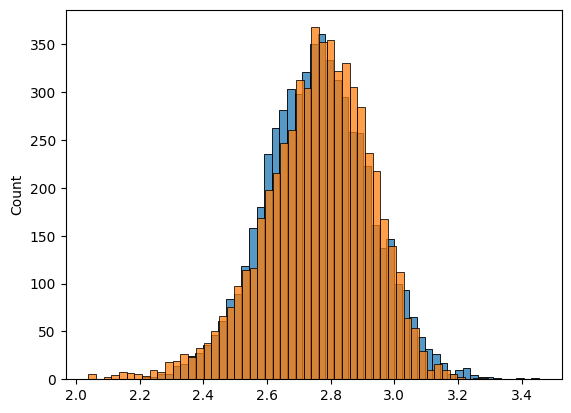

In [70]:
def prepare_median_X(df):
    df_median=(df.median(numeric_only=True))

    return df.fillna(df_median)

xTrain = prepare_median_X(dfTrain)
w0, w = linear_regression(xTrain, yTrain)


yPred = w0 + xTrain.dot(w)

sns.histplot(yPred)
sns.histplot(yTrain)

In [71]:
xVal = prepare_median_X(dfVal)
yPred = w0 + xVal.dot(w)

rmse(yVal, yPred)

np.float64(0.04)

<h3>Response: - its the same


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

In [ ]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
     
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]


# Prepara X para cada iteración
xTrain = prepare_X(dfTrain)
xVal = prepare_X(dfVal)

r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = []

for r in r_values:
    w0, w = train_linear_regression_reg(xTrain, yTrain, r=r) 
    yPred = w0 + xVal.dot(w)
    score = rmse(yVal, yPred)
    
    # Calcula RMSE
    score = rmse(yVal, yPred)
    rmse_scores.append(score)
    print(f"r = {r}, RMSE = {score}")

best_r = r_values[np.argmin(rmse_scores)]
print(f"\nMejor r: {best_r}, con RMSE: {min(rmse_scores)}")

# Visualiza los resultados
plt.figure(figsize=(10, 6))
plt.plot(r_values, rmse_scores, '-o')
plt.xscale('log')
plt.xlabel('r (regularización)')
plt.ylabel('RMSE')
plt.title('RMSE vs Regularización')
plt.grid(True)
plt.show()


ValueError: operands could not be broadcast together with shapes (1940,) (5824,) 

### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.001
- 0.006
- 0.060
- 0.600

In [73]:
seeds=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores=[]


for seed in seeds:    
    
    idx = np.arange(len(df))
    np.random.seed(seed)
    np.random.shuffle(idx)
    dfVal = df.iloc[idx[:nval]]
    dfTrain = df.iloc[idx[nval:nval+ntrain]]
    dfTest = df.iloc[idx[nval+ntrain:]]

    xTrain=prepare_X(dfTrain)
    xVal = prepare_X(dfVal)     
    
    w0, w = linear_regression(xTrain, yTrain)
    yPred = w0 + xVal.dot(w)


    score = rmse(yVal, yPred)
    rmse_scores.append(score)

print(rmse_scores)

np.std(rmse_scores)
    


[np.float64(0.17), np.float64(0.17), np.float64(0.17), np.float64(0.17), np.float64(0.17), np.float64(0.17), np.float64(0.17), np.float64(0.17), np.float64(0.17), np.float64(0.17)]


np.float64(2.7755575615628914e-17)